# Notebook for Week 6 Analysis

## Masterclass

In [21]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import math

In [22]:
# Import trajectory
file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week6/Inputs/PLUMED_A/traj_comp.xtc'
top_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week6/Inputs/PLUMED_A/confout.gro'
trajA = md.load_xtc(file_path, top=top_path)

file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week6/Inputs/PLUMED_B/traj_comp.xtc'
top_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week6/Inputs/PLUMED_B/confout.gro'
trajB = md.load_xtc(file_path, top=top_path)

In [23]:
# Compute phi and psi
pi = math.pi
phiA = md.compute_phi(trajA)
psiA = md.compute_psi(trajA)
phiB = md.compute_phi(trajB)
psiB = md.compute_psi(trajB)

In [24]:
# Merge lists
phi = phiA[1] + phiB[1]
psi = psiA[1] + psiB[1]

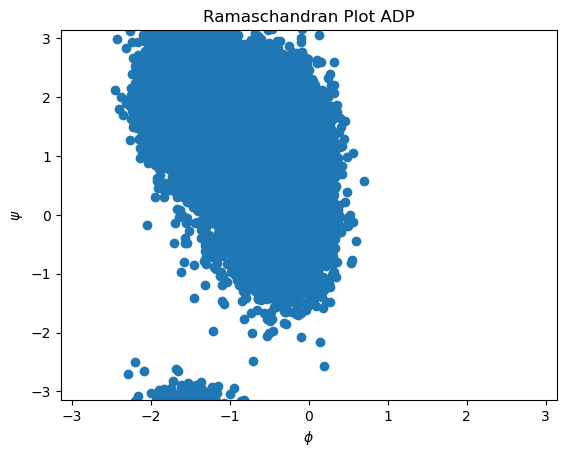

In [25]:
# Plot Ramaschandran
plt.title('Ramaschandran Plot ADP')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.scatter(phi, psi)
plt.xlim(-pi, pi)
plt.ylim(-pi, pi)
plt.show()

In [26]:
# Read in COLVAR
COLVAR_A = np.loadtxt('/home/tje3676/comp-lab-class/comp-lab-class/Week6/Inputs/PLUMED_A/COLVAR', comments=['#', '!'], usecols=(0, 1, 2))
COLVAR_B = np.loadtxt('/home/tje3676/comp-lab-class/comp-lab-class/Week6/Inputs/PLUMED_B/COLVAR', comments=['#', '!'], usecols=(0, 1, 2))

In [27]:
# Plot angles
phiA = COLVAR_A[:,1]
psiA = COLVAR_A[:,2]
phiB = COLVAR_B[:,1]
psiB = COLVAR_B[:,2]

phi = phiA + phiB
psi = psiA + psiB

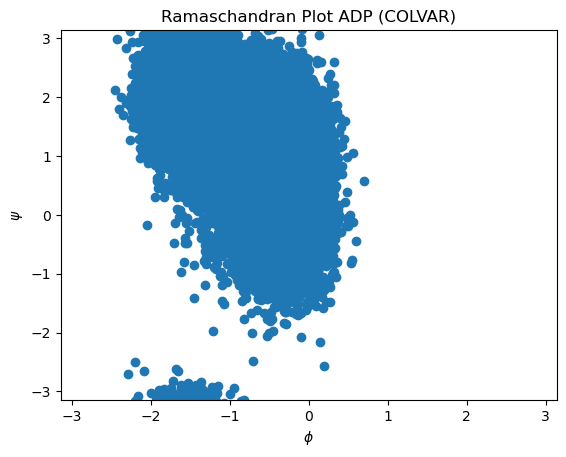

In [28]:
# Plot Ramaschandran
plt.title('Ramaschandran Plot ADP (COLVAR)')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.scatter(phi.tolist(), psi.tolist())
plt.xlim(-pi, pi)
plt.ylim(-pi, pi)
plt.show()

In [29]:
# Compute SD
stdev_phi = np.std(phi)
stdev_psi = np.std(psi)

# Print
print(f'STDEV phi: {stdev_phi} \nSTDEV psi: {stdev_psi}')

STDEV phi: 0.5689472725790758 
STDEV psi: 1.080978826020879


## Lugano Tutorial

### Exercise 1

In [32]:
# Load Data
grid_en = np.loadtxt('Inputs/LUGANO_A/gridA.dat', comments=['#', '!'])

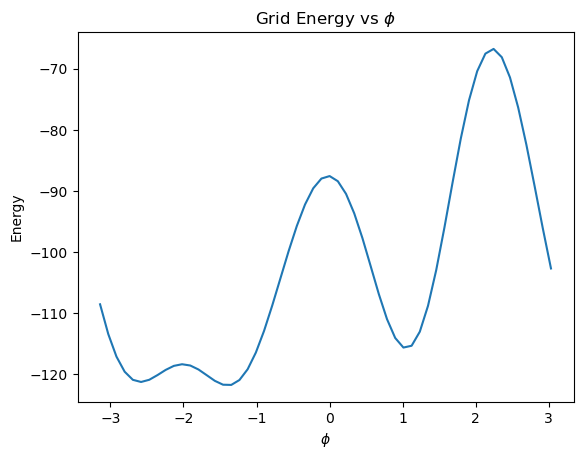

In [36]:
# Plot negative of energy column
plt.title('Grid Energy vs $\phi$')
plt.xlabel('$\phi$')
plt.ylabel('Energy')
plt.plot(grid_en[:,0], - grid_en[:,1])

### Exercise 2

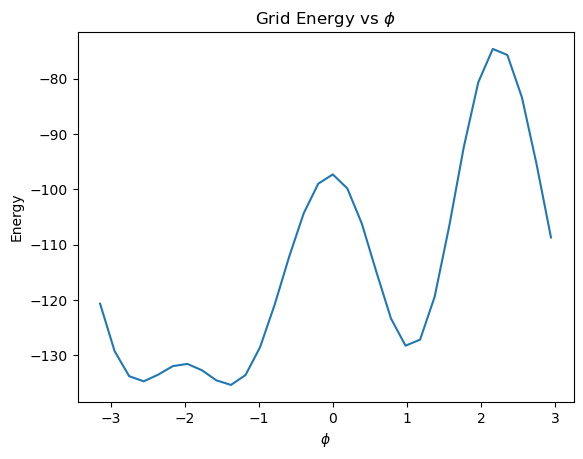

In [35]:
# Load data
fes_en = np.loadtxt('Inputs/LUGANO_A/fes.dat', comments=['#', '!'])

# Plot
plt.title('Grid Energy vs $\phi$')
plt.xlabel('$\phi$')
plt.ylabel('Energy')
plt.plot(fes_en[:,0], fes_en[:,1])

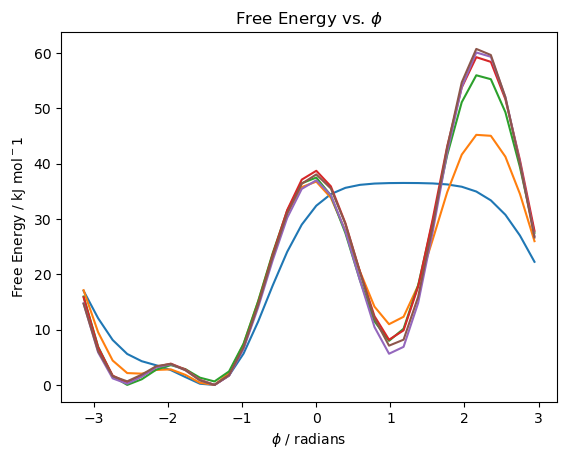

In [43]:
# Load Data
times = [0, 3, 10, 20, 50, 100]
fes_list = [np.loadtxt(f'Inputs/LUGANO_A/fes_{time}.dat', comments=['#', '!']) for time in times]

# Setup plot
plt.title('Free Energy vs. $\phi$')
plt.xlabel('$\phi$ / radians')
plt.ylabel('Free Energy / kJ mol${}^-1$')

# Iterate
for fes in fes_list:
    plt.plot(fes[:,0], fes[:,1])

# Show plot
plt.show()